In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("~/final_dataset.csv")
df.head(3)

,AMT_CREDIT_SUM,CREDIT_TYPE_Credit card,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Microloan,CREDIT_ACTIVE_Active,DAYS_CREDIT_UPDATE,DAYS_CREDIT,CREDIT_ACTIVE_Closed,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,...,REGION_POPULATION_RELATIVE,AMT_CREDIT_x,AMT_INCOME_TOTAL,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Pensioner,CODE_GENDER_M,CODE_GENDER_F,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,TARGET
0,195507.184091,0.200000,0.750000,0.0,0.375000,-481.833333,-1050.571429,0.625000,14985.0,0.197230,...,0.020246,545040.0,135000.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,210338.492143,0.214286,0.785714,0.0,0.285714,-1103.214286,-1319.785714,0.714286,3375.0,0.085800,...,0.014464,397881.0,76500.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,195507.184091,0.200000,0.750000,0.0,0.375000,-481.833333,-1050.571429,0.625000,3375.0,0.066315,...,0.006671,427500.0,157500.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [4]:
df.columns

Index(['AMT_CREDIT_SUM', 'CREDIT_TYPE_Credit card',
       'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Microloan',
       'CREDIT_ACTIVE_Active', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT',
       'CREDIT_ACTIVE_Closed', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT',
       'CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT', 'SK_DPD_DEF_x',
       'MONTHS_BALANCE_x', 'DAYS_TERMINATION', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE', 'AMT_ANNUITY',
       'CNT_PAYMENT', 'NAME_GOODS_CATEGORY_XNA', 'NAME_PORTFOLIO_POS',
       'NAME_PRODUCT_TYPE_walk-in', 'PRODUCT_COMBINATION_Cash Street: high',
       'PRODUCT_COMBINATION_Cash X-Sell: high',
       'PRODUCT_COMBINATION_POS industry with interest',
       'NAME_YIELD_GROUP_low_normal',
       'NAME_SELLER_INDUSTRY_Consumer electronics', 'NAME_SELLER_INDUSTRY_XNA',
       'NAME_YIELD_GROUP_XNA', 'NAME_YIELD_GROUP_high',
       'NAME_PAYMENT_TYPE_XNA', 'NAME_PAYMENT_TYPE_Cash through the bank',
       'NAME_CONTRACT_

In [5]:
df.shape

(565372, 83)

In [6]:
df.isnull().sum()

AMT_CREDIT_SUM                                       0
CREDIT_TYPE_Credit card                              0
CREDIT_TYPE_Consumer credit                          0
CREDIT_TYPE_Microloan                                0
CREDIT_ACTIVE_Active                                 0
                                                    ..
CODE_GENDER_M                                        0
CODE_GENDER_F                                        0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCATION_TYPE_Secondary / secondary special    0
TARGET                                               0
Length: 83, dtype: int64

In [7]:
df.columns

Index(['AMT_CREDIT_SUM', 'CREDIT_TYPE_Credit card',
       'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Microloan',
       'CREDIT_ACTIVE_Active', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT',
       'CREDIT_ACTIVE_Closed', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT',
       'CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT', 'SK_DPD_DEF_x',
       'MONTHS_BALANCE_x', 'DAYS_TERMINATION', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE', 'AMT_ANNUITY',
       'CNT_PAYMENT', 'NAME_GOODS_CATEGORY_XNA', 'NAME_PORTFOLIO_POS',
       'NAME_PRODUCT_TYPE_walk-in', 'PRODUCT_COMBINATION_Cash Street: high',
       'PRODUCT_COMBINATION_Cash X-Sell: high',
       'PRODUCT_COMBINATION_POS industry with interest',
       'NAME_YIELD_GROUP_low_normal',
       'NAME_SELLER_INDUSTRY_Consumer electronics', 'NAME_SELLER_INDUSTRY_XNA',
       'NAME_YIELD_GROUP_XNA', 'NAME_YIELD_GROUP_high',
       'NAME_PAYMENT_TYPE_XNA', 'NAME_PAYMENT_TYPE_Cash through the bank',
       'NAME_CONTRACT_

In [8]:
preds = ['AMT_CREDIT_SUM', 'CREDIT_TYPE_Credit card',
       'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Microloan',
       'CREDIT_ACTIVE_Active', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT',
       'CREDIT_ACTIVE_Closed', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT',
       'CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT', 'SK_DPD_DEF_x',
       'MONTHS_BALANCE_x', 'DAYS_TERMINATION', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE', 'AMT_ANNUITY',
       'CNT_PAYMENT', 'NAME_GOODS_CATEGORY_XNA', 'NAME_PORTFOLIO_POS',
       'NAME_PRODUCT_TYPE_walk-in', 'PRODUCT_COMBINATION_Cash Street: high',
       'PRODUCT_COMBINATION_Cash X-Sell: high',
       'PRODUCT_COMBINATION_POS industry with interest',
       'NAME_YIELD_GROUP_low_normal',
       'NAME_SELLER_INDUSTRY_Consumer electronics', 'NAME_SELLER_INDUSTRY_XNA',
       'NAME_YIELD_GROUP_XNA', 'NAME_YIELD_GROUP_high',
       'NAME_PAYMENT_TYPE_XNA', 'NAME_PAYMENT_TYPE_Cash through the bank',
       'NAME_CONTRACT_STATUS_Refused', 'NAME_CONTRACT_STATUS_Approved',
       'CODE_REJECT_REASON_SCOFR', 'NAME_CLIENT_TYPE_New',
       'CODE_REJECT_REASON_XAP', 'AMT_APPLICATION',
       'NAME_CONTRACT_TYPE_Consumer loans', 'SELLERPLACE_AREA',
       'DAYS_DECISION', 'HOUR_APPR_PROCESS_START_y', 'CODE_REJECT_REASON_HC',
       'AMT_PAYMENT', 'AMT_PAYMENT_x', 'AMT_PAYMENT_y', 'DAYS_ENTRY_PAYMENT',
       'DAYS_ENTRY_PAYMENT_x', 'DAYS_ENTRY_PAYMENT_y',
       'NUM_INSTALMENT_VERSION_x', 'NUM_INSTALMENT_NUMBER_x',
       'DAYS_INSTALMENT_x', 'AMT_INSTALMENT_x', 'SK_ID_PREV_x',
       'NUM_INSTALMENT_NUMBER_y', 'DAYS_INSTALMENT', 'AMT_INSTALMENT',
       'AMT_INSTALMENT_y', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE_x',
       'AMT_ANNUITY_x', 'DAYS_LAST_PHONE_CHANGE', 'ORGANIZATION_TYPE_XNA',
       'FLAG_DOCUMENT_3', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMP_PHONE', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'REGION_POPULATION_RELATIVE', 'AMT_CREDIT_x', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE_Working', 'NAME_INCOME_TYPE_Pensioner',
       'CODE_GENDER_M', 'CODE_GENDER_F',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special']

In [9]:
X = df[preds]
y = df['TARGET']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .67 )

In [11]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

Imputing Missing Values:

In [15]:
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [16]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)

/Users/aakankshachauhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [82]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
boston = load_boston()
X = boston.data
Y = boston.target

lineReg = LinearRegression()
lineReg.fit(X, Y)
lineReg.score(X, Y)

0.7406426641094095

In [83]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf= LogisticRegression()

In [20]:
clf.fit(X_train,y_train)

/Users/aakankshachauhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions= clf.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n         0.0       0.60      0.56      0.58     93479\n         1.0       0.59      0.63      0.61     93094\n\n    accuracy                           0.60    186573\n   macro avg       0.60      0.60      0.60    186573\nweighted avg       0.60      0.60      0.60    186573\n'

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, predictions)

array([[52531, 40948],
       [34519, 58575]])

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, predictions)

0.5955095324618246

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [48]:
y_pred = clf.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.56      0.58     93479
         1.0       0.59      0.63      0.61     93094

    accuracy                           0.60    186573
   macro avg       0.60      0.60      0.60    186573
weighted avg       0.60      0.60      0.60    186573



In [50]:
cm = confusion_matrix(y_test, y_pred)

In [53]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.56      0.58     93479
         1.0       0.59      0.63      0.61     93094

    accuracy                           0.60    186573
   macro avg       0.60      0.60      0.60    186573
weighted avg       0.60      0.60      0.60    186573



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.915


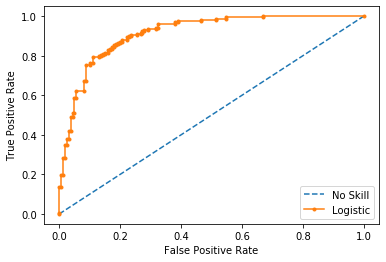

In [54]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.33, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
clf = LogisticRegression(solver='lbfgs')
clf.fit(trainX, trainy)
# predict probabilities
lr_probs = clf.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [35]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Decision Tree: ROC AUC=0.631


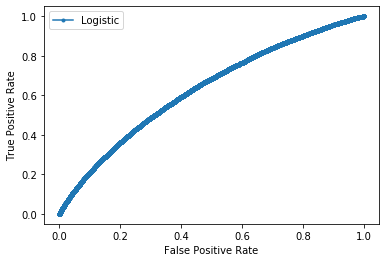

In [36]:
# predict probabilities
probs = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label = 1)

# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, lr_probs, pos_label = 1)

In [41]:
import matplotlib.pyplot as plt

ROC AUC=0.631


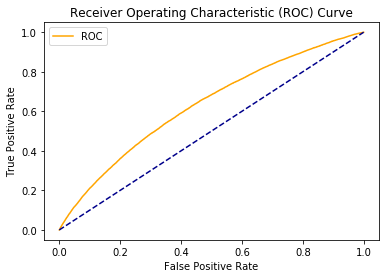

In [42]:
print('ROC AUC=%.3f' % (lr_auc))
plot_roc_curve(fpr, tpr)

Grid Search for Optimizing Hyper-parameters:

In [71]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [72]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [73]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [74]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [75]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [76]:
# Fit grid search
best_model = clf.fit(X, y)

/Users/aakankshachauhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/aakankshachauhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/aakankshachauhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py

In [77]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [78]:
# Predict target vector
best_model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
clf = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)

ROC AUC=0.500


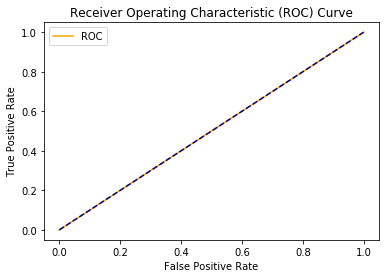

In [83]:
# predict probabilities
probs = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, lr_probs, pos_label = 1)

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
print('ROC AUC=%.3f' % (lr_auc))
plot_roc_curve(fpr, tpr)

In [84]:
%%time
clf = MLPClassifier()

param_grid = {'hidden_layer_sizes':[(10,10),(20,20),(30,30),(40,40)],
             'activation':["relu"]}

search = GridSearchCV(clf, param_grid, cv=5)
grid = search.fit(X_train, y_train)

CPU times: user 1h 11min 48s, sys: 1min 15s, total: 1h 13min 4s
Wall time: 18min 29s


In [85]:
%%time
grid.best_params_

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


{'activation': 'relu', 'hidden_layer_sizes': (40, 40)}

In [ ]:
# predict probabilities
probs = grid.best_estimator_.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, lr_probs, pos_label = 1)

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
print('ROC AUC=%.3f' % (lr_auc))
plot_roc_curve(fpr, tpr)

In [67]:
from sklearn.model_selection import GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons()
calibrated_forest = CalibratedClassifierCV(
base_estimator = RandomForestClassifier(n_estimators=10))
param_grid = {
'base_estimator__max_depth': [2, 4, 6, 8]}
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(X, y)
GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(...),
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]})


GridSearchCV(cv=5, error_score=nan,
             estimator=CalibratedClassifierCV(base_estimator=Ellipsis, cv=None,
                                              method='sigmoid'),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# predict probabilities
probs = grid.best_estimator_.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Test Data AUC=%.3f' % (lr_auc))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr_probs, pos_label = '>50K')
print('Test Data AUC=%.3f' % (lr_auc))
plot_roc_curve(fpr, tpr)

In [ ]:
clf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 150, 200],'max_depth': [5,10,15,20,30,40]}
search = GridSearchCV(clf, param_grid, cv=5)
grid = search.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
# predict probabilities
probs = grid.best_estimator_.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)

fpr, tpr, thresholds = roc_curve(y_test, lr_probs, pos_label = '>50K')
print('Test Data AUC=%.3f' % (lr_auc))
plot_roc_curve(fpr, tpr)

We can also tune for the hyperparameters:

In [ ]:
%%time
clf = MLPClassifier()

param_grid = {'hidden_layer_sizes':[(10,10),(20,20),(30,30),(40,40)],
             'activation':["relu"]}

search = GridSearchCV(clf, param_grid, cv=5)
grid = search.fit(X_train, y_train)

In [ ]:
%%time
grid.best_params_

In [ ]:
# predict probabilities
probs = grid.best_estimator_.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, lr_probs, pos_label = '>50K')

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
print('ROC AUC=%.3f' % (lr_auc))
plot_roc_curve(fpr, tpr)